### Exploratory Data Analysis of US flights

#### Arina Sitnikova

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The data was downloaded from this [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). The dataset has information about carriers and flights between US airports during the year 2008. 


In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [3]:
%%time
flights_df = pd.read_csv('2008.csv', usecols=dtype.keys(), dtype=dtype)

CPU times: user 17.9 s, sys: 1.12 s, total: 19 s
Wall time: 19.6 s


Checking the number of rows and columns and printing column names.

In [4]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [5]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


It is always worth checking basic statistics of each feature:

In [6]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


Also, we can notice that there are 20 unique carriers. One of the companies perform a large share of flights compared to the rest of the companies:

In [7]:
flights_df['UniqueCarrier'].nunique()

20

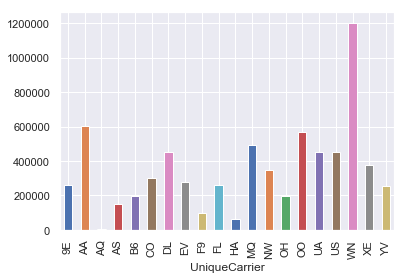

In [10]:
sns.set()
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

We can also find the top of flight codes that have the largest total distance travelled in 2008. What we can see is that the carrier with a code 'CO' performed two different flights with the largest distances (both two times as large as the next route UA-52):

In [12]:
flights_df.groupby(['UniqueCarrier','FlightNum']).agg({'Distance': [np.mean, np.sum, 'count'],'Cancelled': np.sum}).sort_values(('Distance', 'sum'), ascending=False).iloc[0:5]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8
AA            283        2448.115702  1777332.0   726         2
UA            44         2387.818182  1733556.0   726         0

Now let's find the most frequent route in terms of the number of flights:

In [138]:
flights_df.groupby(['Origin', 'Dest']).size().sort_values(ascending = False).head()

Origin  Dest
SFO     LAX     13788
LAX     SFO     13390
OGG     HNL     12383
LGA     BOS     12035
BOS     LGA     12029
dtype: int64

The most frequent routes turned out to be one of the most delayed routes as well:

In [153]:
flights_df[(flights_df['DepDelay'] > 0)].groupby(['Origin', 'Dest']).size().sort_values(ascending = False).head()

Origin  Dest
LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5311
HOU     DAL     5288
dtype: int64

Just a brief look at the number of flights by days of week and months:

In [20]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


With numbers, it is not easy to notice any tendencies. It can be handy to color the table in order to easily notice outliers:

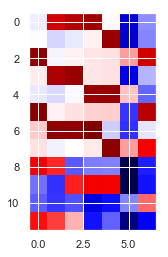

In [17]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none')
plt.show()

The distribution showing total flight distance is skewed to the left, which is expected: the majority of the companies perform short- and medium-haul flights:

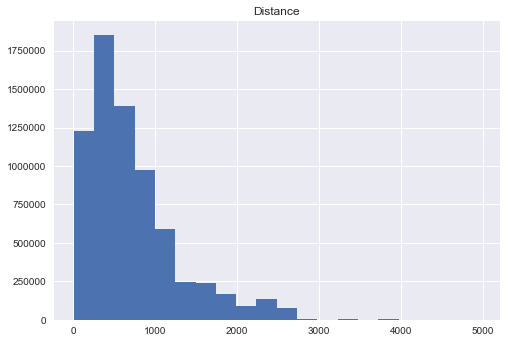

In [27]:
flights_df.hist('Distance', bins=20)
plt.show()

We can assume that more flights are in demand in the summer. We can check it by making a histogram of flight frequency by date:

In [30]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [31]:
num_flights_by_date = flights_df.groupby('Date').size()

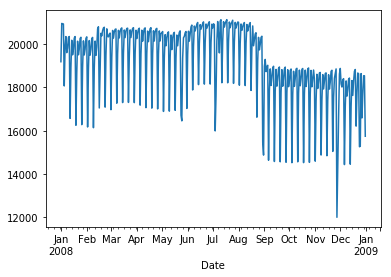

In [18]:
num_flights_by_date.plot();

It's easier to see the pattern if we plot rolling mean. The graph below justifies the hypothesis:

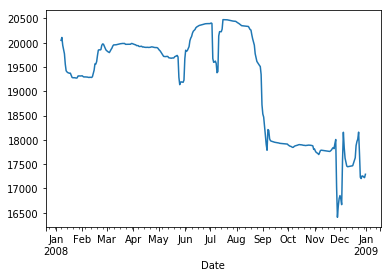

In [19]:
num_flights_by_date.rolling(window=7).mean().plot();



The numbers also prove that there are fewer flights during winter than during summer. Likewise, the number of flights during weekends is less than during weekdays.

In [167]:
flights_df.groupby(['Month']).size().sort_values(ascending = False)

Month
7     627931
3     616090
8     612279
6     608665
5     606293
1     605765
4     598126
2     569236
10    556205
12    544958
9     540908
11    523272
dtype: int64

In [166]:
flights_df.groupby(['DayOfWeek']).size().sort_values(ascending = False)

DayOfWeek
3    1039665
1    1036201
5    1035166
4    1032224
2    1032049
7     976887
6     857536
dtype: int64


Based on the dataset, it is possible to do some data engineering that will be useful for further analysis. For example, as we can see, DepTime is distributed from 1 to 2400 (hhmm format). We can get the departure hour feature:

In [32]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [33]:
flights_df['DepHour'].describe()

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

In fact, there are not so many cancelled flights - just over 1%:

In [18]:
flights_df['Cancelled'].value_counts(normalize = True)

0    0.980394
1    0.019606
Name: Cancelled, dtype: float64

In [50]:
len(flights_df[flights_df['Cancelled'] == 0]) - len(flights_df[flights_df['Cancelled'] == 1])

6734860

But we can determine the carrier that has the greatest number of cancelled flights:

In [117]:
flights_df[flights_df['Cancelled'] == 1].groupby('UniqueCarrier').size().sort_values(ascending = False)

UniqueCarrier
MQ    18331
AA    17440
OO    12436
WN    12389
UA    10541
XE     9992
YV     9219
9E     7100
DL     6813
US     6582
OH     6462
EV     5026
CO     3702
B6     3205
NW     2906
FL     2236
AS     2139
HA      570
F9      303
AQ       42
dtype: int64

The picture is a bit different if we identify the carriers with the greatest number of completed flights:

In [126]:
flights_df[flights_df['Cancelled'] == 0].groupby('UniqueCarrier').size().sort_values(ascending = False).head(10)

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

In [118]:
#flights_df.groupby('UniqueCarrier')['Cancelled'].sum().sort_values(ascending=False)

Most flights are completed between 6 am and 6 pm, with 8 am being an hour with the highest percentage of flights:

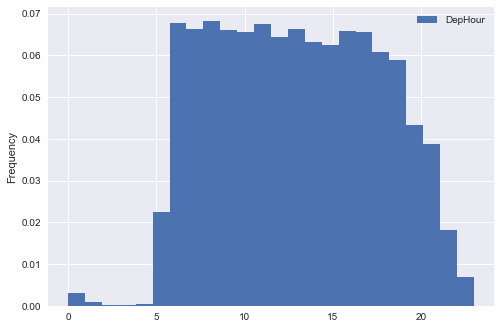

In [98]:
flights_df.plot(y = 'DepHour', kind = 'hist', normed = True, bins = 24)
plt.show()

In [111]:
flights_df.groupby('DepHour').size().sort_values(ascending = False)

DepHour
8.0     449224
6.0     446737
11.0    444702
7.0     436700
13.0    435917
9.0     434850
16.0    434017
17.0    432488
10.0    431460
12.0    424249
14.0    416875
15.0    411126
18.0    400784
19.0    387288
20.0    285991
21.0    254850
5.0     148167
22.0    119651
23.0     46103
0.0      20368
1.0       5861
4.0       3390
2.0       1851
3.0        833
dtype: int64


Likewise, most flights are cancelled in the morning, but specifically between 6 and 9 am. Then we can see a significant drop in the number of cancelled flights. In the evening, however, it rises again. Clearly, with a low number of flights in the night, the number of cancelled flights is also low between 12 and 5 am. At 3 am, there are no cancelled flights at all:

In [92]:
canc = flights_df[flights_df['Cancelled'] == 1]

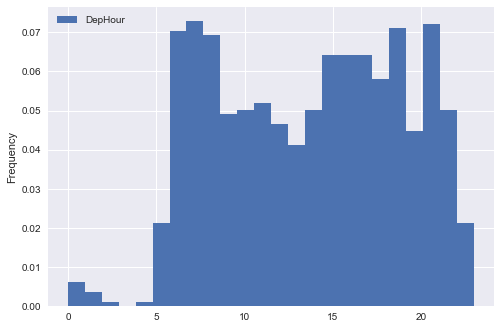

In [97]:
canc.plot(y = 'DepHour', kind = 'hist', normed = True, bins = 24)
plt.show()

In [109]:
flights_df[flights_df['Cancelled'] == 1].groupby('DepHour').size().sort_values(ascending = True)

DepHour
2.0      1
4.0      1
1.0      4
0.0      7
23.0    24
5.0     24
13.0    47
20.0    51
12.0    53
9.0     56
22.0    57
14.0    57
10.0    57
11.0    59
18.0    66
15.0    73
16.0    73
17.0    73
8.0     79
6.0     80
19.0    81
21.0    82
7.0     83
dtype: int64

The most frequent reason for flight cancellation are weather conditions:

In [136]:
flights_df.groupby('CancellationCode').size().sort_values(ascending = False)

CancellationCode
B    54904
A    54330
C    28188
D       12
dtype: int64


```
A - Carrier 
B - Weather 
C - National Air System 
D - Security
```

Below is the graph showing cancellations by month:

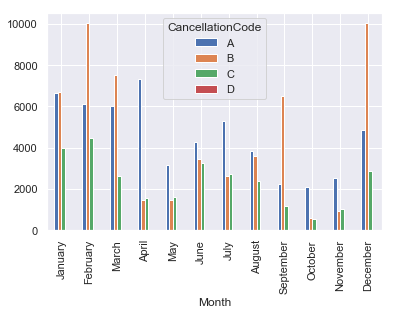

In [19]:
import calendar

month_names = []

for month_idx in flights_df['Month'].unique():
    month_names.append((calendar.month_name[month_idx]))
    
ax = flights_df.groupby(['Month', 'CancellationCode'])\
    .size().unstack().plot(kind='bar')

ax.set_xticklabels(month_names, rotation=90)
plt.show()

Since now we know the departure hour, it might be interesting to examine the average delay for corresponding hour. As we can see, the planes on average departed earlier than they should have done at 5 and 6 am:

In [124]:
flights_df.groupby('DepHour')['DepDelay'].mean().sort_values(ascending = True)

DepHour
5.0      -4.253906
6.0      -1.628906
7.0       0.103699
8.0       1.761719
4.0       3.371094
9.0       3.753906
10.0      5.464844
11.0      6.687500
12.0      7.902344
13.0      8.812500
14.0     10.359375
15.0     11.890625
16.0     11.890625
17.0     13.218750
18.0     15.351562
19.0     16.890625
20.0     22.796875
21.0     23.046875
22.0     38.062500
23.0     60.062500
0.0      70.812500
3.0      95.812500
1.0     112.000000
2.0     122.750000
Name: DepDelay, dtype: float16